In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [81]:
data = pd.read_csv('energydata_complete.csv')

In [82]:
data

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

In [83]:
df = pd.DataFrame(data)

In [84]:
# Step 1: Convert to datetime (if not already done)
df['date'] = pd.to_datetime(df['date'])

# Step 2: Extract useful parts
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek

# Step 3: Drop the original datetime column
df = df.drop('date', axis=1)

In [85]:
df.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...     T_out  Press_mm_hg  RH_out  Windspeed  \
0  19.000000  45.566667  ...  6.600000        733.5    92.0   7.000000   
1  19.000000  45.992500  ...  6.483333        733.6    92.0   6.666667   
2  18.926667  45.890000  ...  6.366667        733.7    92.0   6.333333   
3  18.890000  45.723333  ...  6.250000        733.8    92.0   6.000000   
4  18.890000  45.530000  ...  6.133333        733.9    92.0   5.666667   

   Visibility  Tdewpoint        rv1        rv2  hour  dayofweek  
0   63.000000        5.3  13.275433  13.275433    17          0  
1   59.166667        5.2  18.606195  18.606195    17          0  
2   55.333333        5.1  28.642668  28.642668    17          0  
3   51.500000        5.0  45.410389  45.410389    17          0  
4   47.666667        4.9  10.084097  10.084097    17          0  

[5 rows x 30 columns]

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [87]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...         T_out   Press_mm_hg        RH_out     Windspeed  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...      7.411665    755.522602     79.750418      4.039752   
std    ...      5.317409      7.399441     14.901088      2.451221   
min    ...     -5.000000    729.300000     24.000000      0.000000   
25%    ...      3.666667    750.933333     70.333333      2.000000   
50%    ...      6.916667    756.100000     83.666667      3.666667   
75%    ...     10.408333    760.933333     91.666667      5.500000   
max    ...     26.100000    772.300000    100.000000     14.000000   

         Visibility     Tdewpoint           rv1           rv2          hour  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      38.330834      3.760707     24.988033     24.988033     11.502002   
std       11.794719      4.194648     14.496634     14.496634      6.921953   
min        1.000000     -6.600000      0.005322      0.005322      0.000000   
25%       29.000000      0.900000     12.497889     12.497889      6.000000   
50%       40.000000      3.433333     24.897653     24.897653     12.000000   
75%       40.000000      6.566667     37.583769     37.583769     17.000000   
max       66.000000     15.500000     49.996530     49.996530     23.000000   

          dayofweek  
count  19735.000000  
mean       2.977249  
std        1.985617  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000  

[8 rows x 30 columns]

In [88]:
df.shape

(19735, 30)

In [89]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'hour', 'dayofweek'],
      dtype='object')

In [90]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
hour           0
dayofweek      0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
numerical_df = df.select_dtypes(include = 'number')
numerical_df

Appliances  lights         T1       RH_1         T2       RH_2  \
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
...           ...     ...        ...        ...        ...        ...   
19730         100       0  25.566667  46.560000  25.890000  42.025714   
19731          90       0  25.500000  46.500000  25.754000  42.080000   
19732         270      10  25.500000  46.596667  25.628571  42.768571   
19733         420      10  25.500000  46.990000  25.414000  43.036000   
19734         430      10  25.500000  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4  ...      T_out  \
0      19.790000  44.730000  19.000000  45.566667  ...   6.600000   
1      19.790000  44.790000  19.000000  45.992500  ...   6.483333   
2      19.790000  44.933333  18.926667  45.890000  ...   6.366667   
3      19.790000  45.000000  18.890000  45.723333  ...   6.250000   
4      19.790000  45.000000  18.890000  45.530000  ...   6.133333   
...          ...        ...        ...        ...  ...        ...   
19730  27.200000  41.163333  24.700000  45.590000  ...  22.733333   
19731  27.133333  41.223333  24.700000  45.590000  ...  22.600000   
19732  27.050000  41.690000  24.700000  45.730000  ...  22.466667   
19733  26.890000  41.290000  24.700000  45.790000  ...  22.333333   
19734  26.823333  41.156667  24.700000  45.963333  ...  22.200000   

       Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0            733.5  92.000000   7.000000   63.000000   5.300000  13.275433   
1            733.6  92.000000   6.666667   59.166667   5.200000  18.606195   
2            733.7  92.000000   6.333333   55.333333   5.100000  28.642668   
3            733.8  92.000000   6.000000   51.500000   5.000000  45.410389   
4            733.9  92.000000   5.666667   47.666667   4.900000  10.084097   
...            ...        ...        ...         ...        ...        ...   
19730        755.2  55.666667   3.333333   23.666667  13.333333  43.096812   
19731        755.2  56.000000   3.500000   24.500000  13.300000  49.282940   
19732        755.2  56.333333   3.666667   25.333333  13.266667  29.199117   
19733        755.2  56.666667   3.833333   26.166667  13.233333   6.322784   
19734        755.2  57.000000   4.000000   27.000000  13.200000  34.118851   

             rv2  hour  dayofweek  
0      13.275433    17          0  
1      18.606195    17          0  
2      28.642668    17          0  
3      45.410389    17          0  
4      10.084097    17          0  
...          ...   ...        ...  
19730  43.096812    17          4  
19731  49.282940    17          4  
19732  29.199117    17          4  
19733   6.322784    17          4  
19734  34.118851    18          4  

[19735 rows x 30 columns]

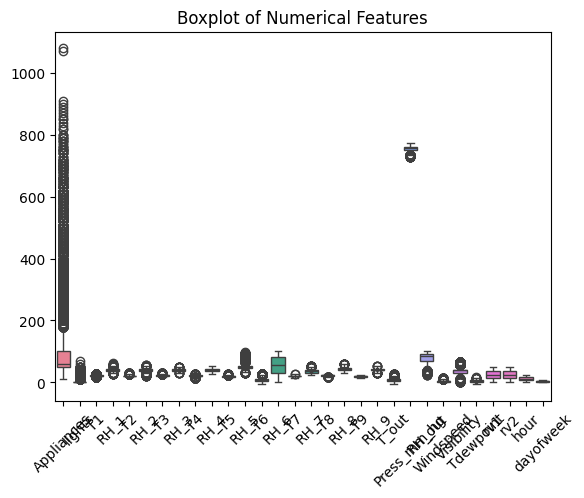

In [93]:
sns.boxplot(data=numerical_df)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


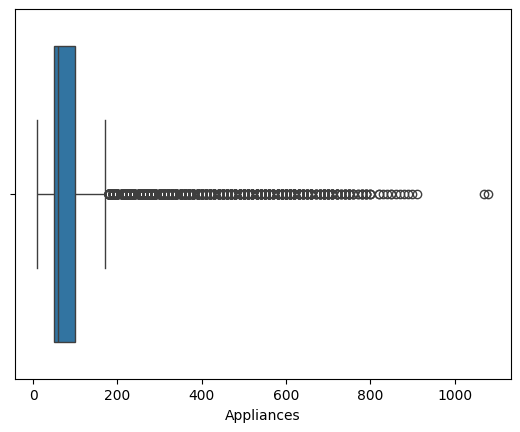

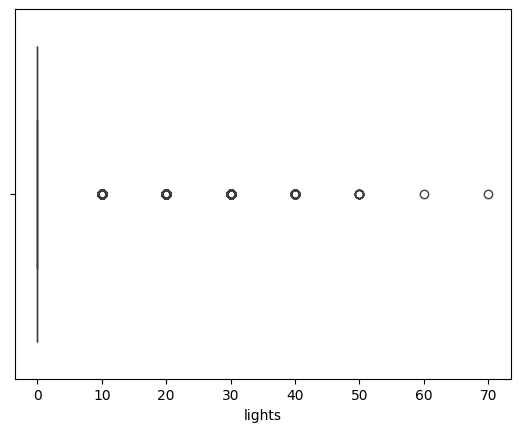

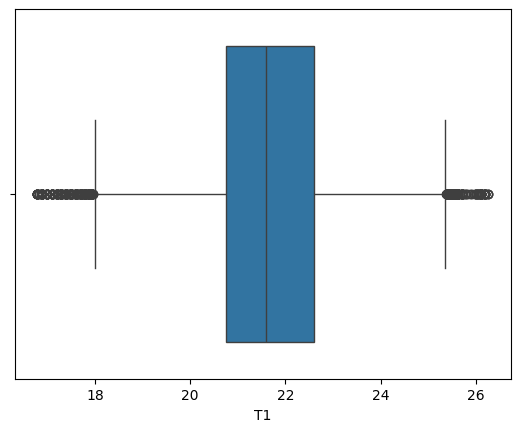

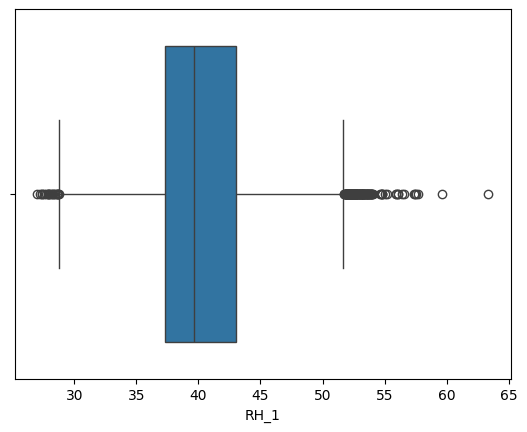

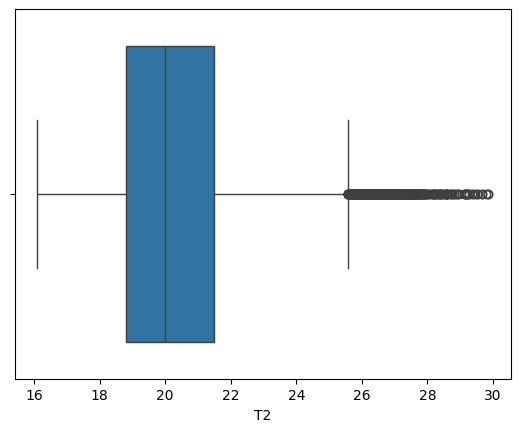

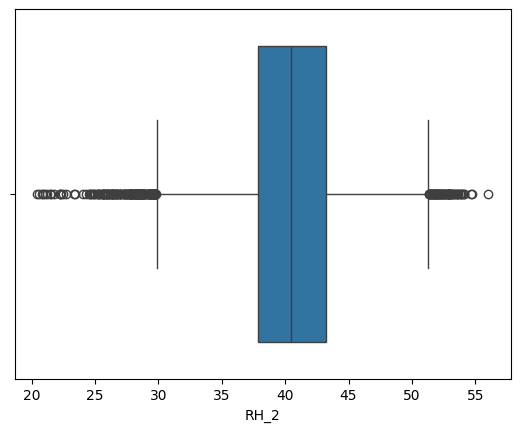

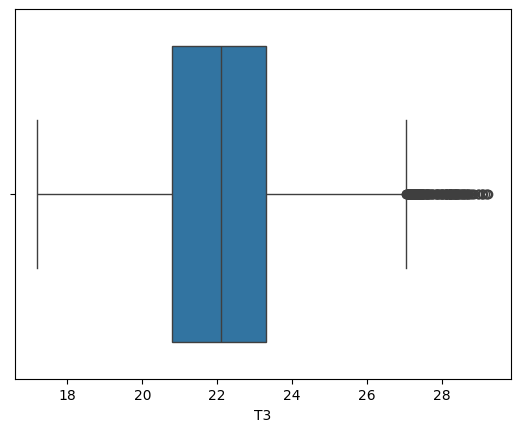

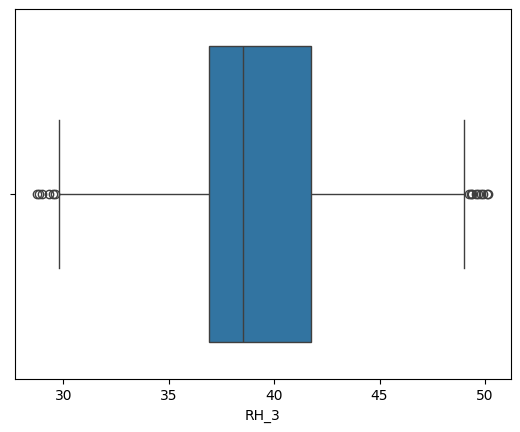

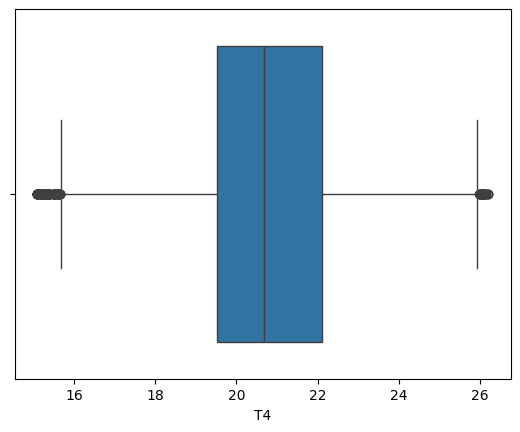

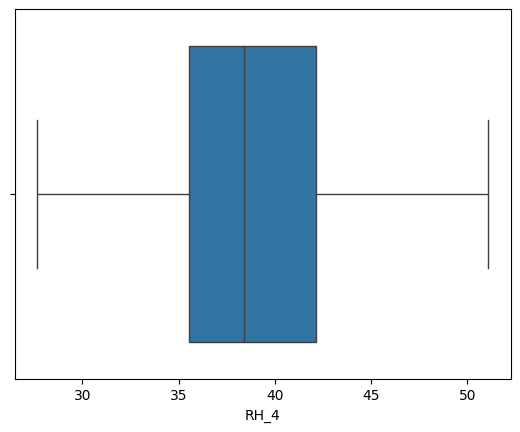

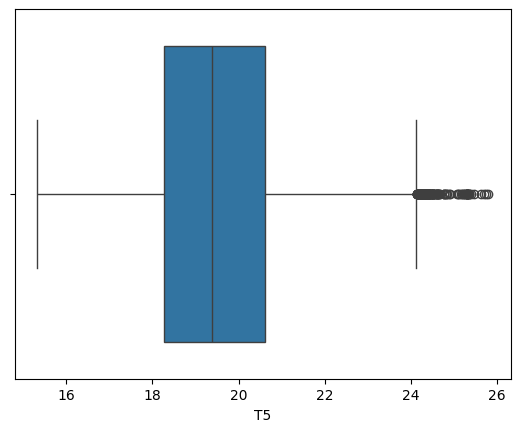

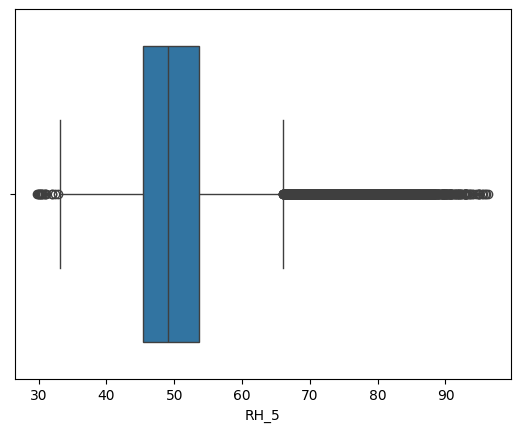

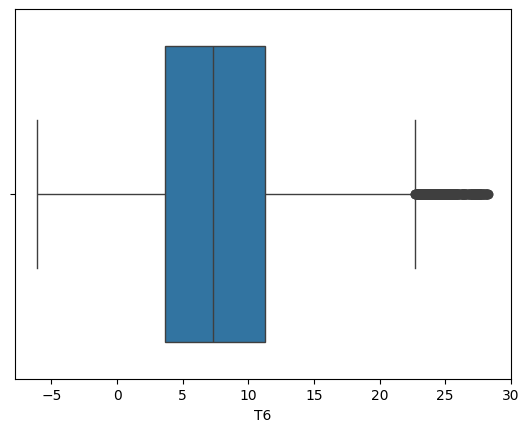

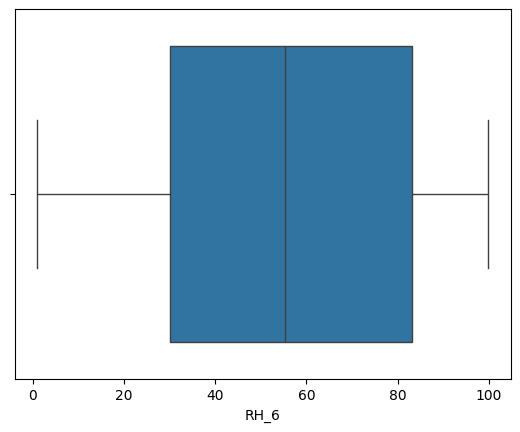

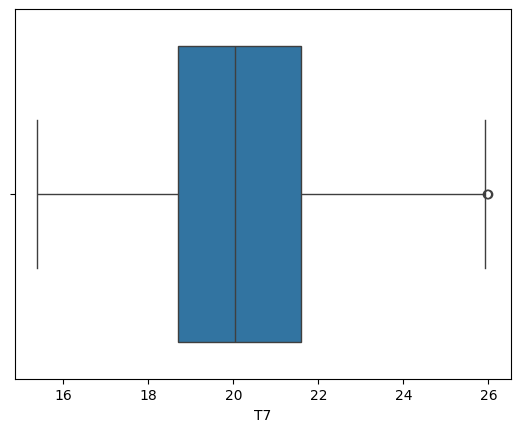

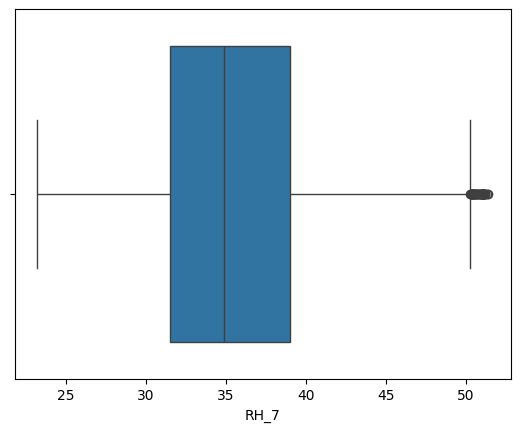

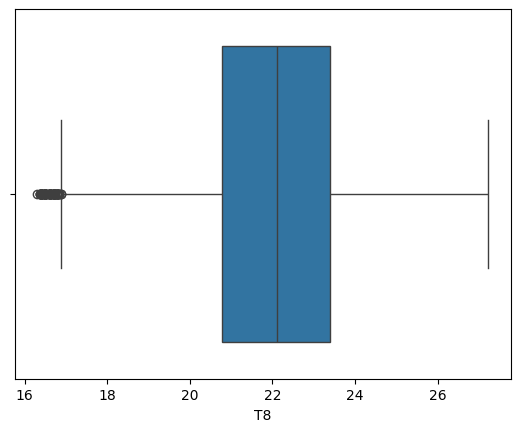

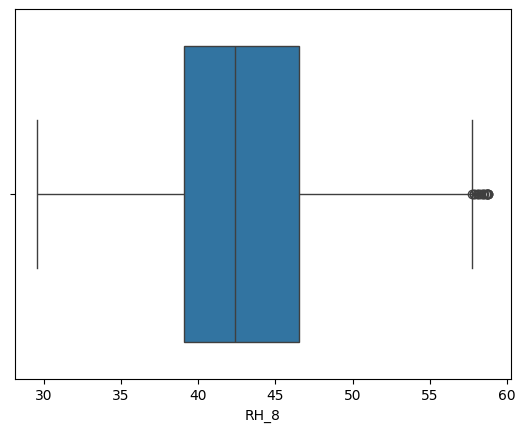

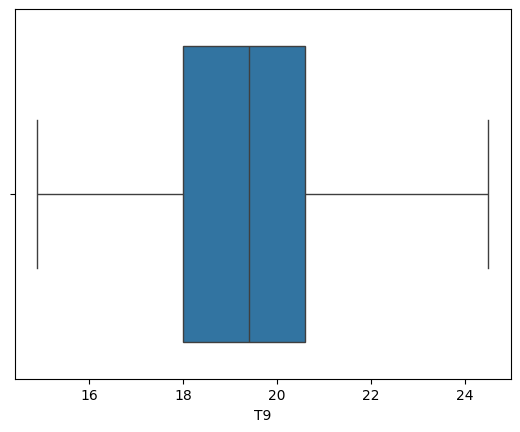

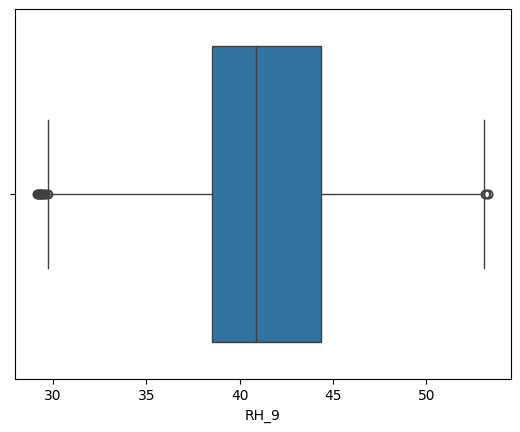

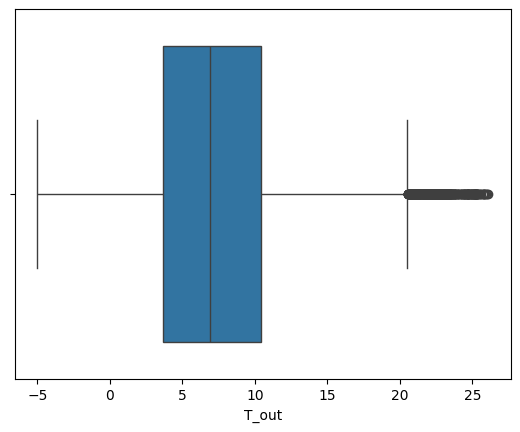

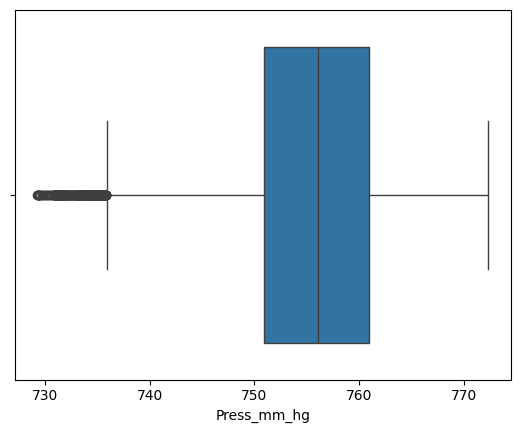

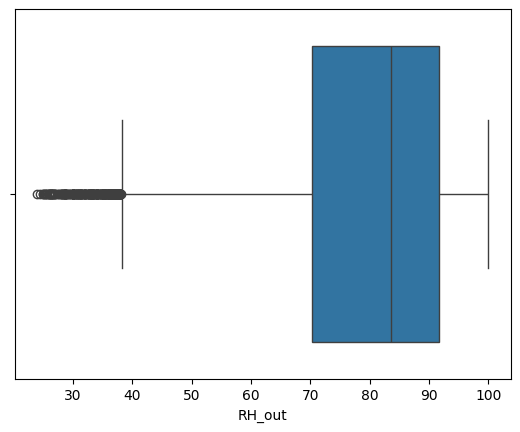

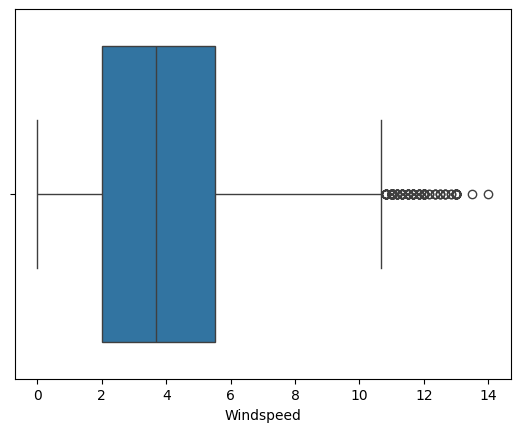

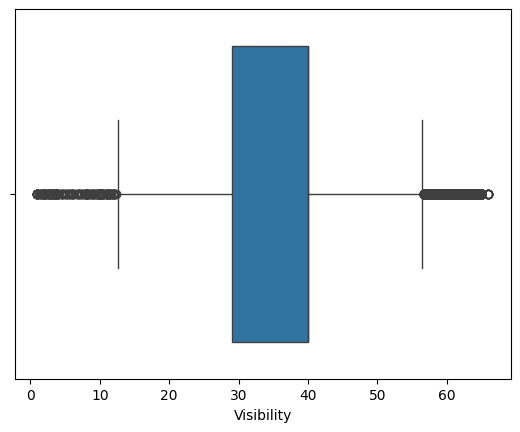

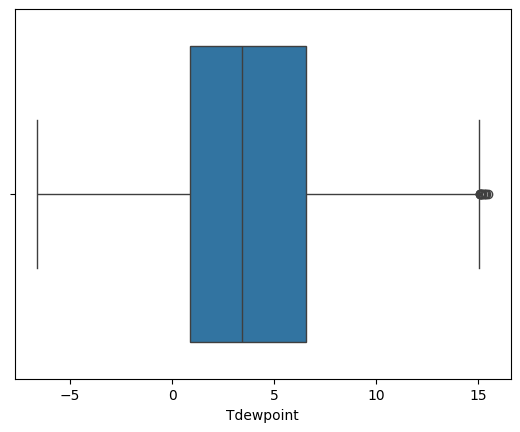

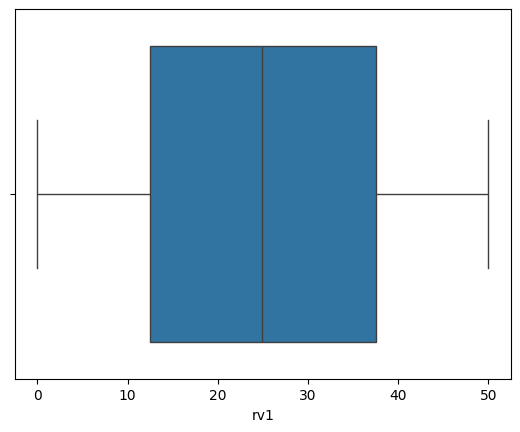

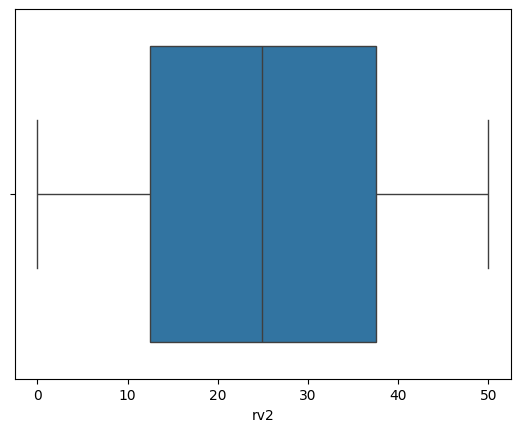

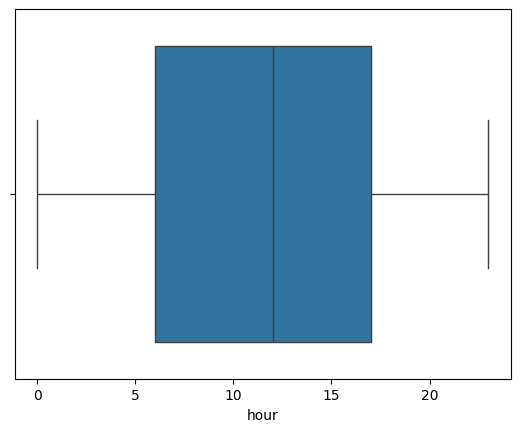

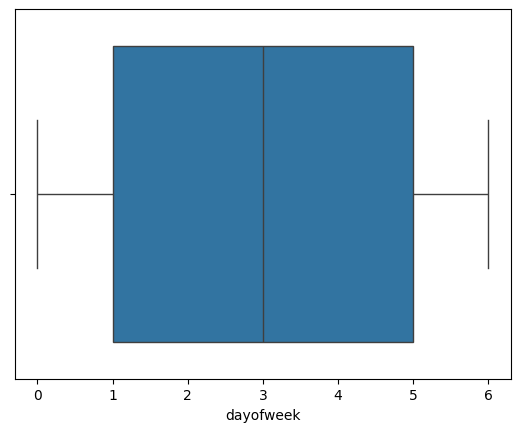

In [94]:
for i in numerical_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [95]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [96]:
df1 = outliers(df)

In [97]:
df1.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0        60.0     0.0  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1        60.0     0.0  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2        50.0     0.0  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3        50.0     0.0  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4        60.0     0.0  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...     T_out  Press_mm_hg  RH_out  Windspeed  \
0  19.000000  45.566667  ...  6.600000   735.933333    92.0   7.000000   
1  19.000000  45.992500  ...  6.483333   735.933333    92.0   6.666667   
2  18.926667  45.890000  ...  6.366667   735.933333    92.0   6.333333   
3  18.890000  45.723333  ...  6.250000   735.933333    92.0   6.000000   
4  18.890000  45.530000  ...  6.133333   735.933333    92.0   5.666667   

   Visibility  Tdewpoint        rv1        rv2  hour  dayofweek  
0   56.500000        5.3  13.275433  13.275433    17          0  
1   56.500000        5.2  18.606195  18.606195    17          0  
2   55.333333        5.1  28.642668  28.642668    17          0  
3   51.500000        5.0  45.410389  45.410389    17          0  
4   47.666667        4.9  10.084097  10.084097    17          0  

[5 rows x 30 columns]

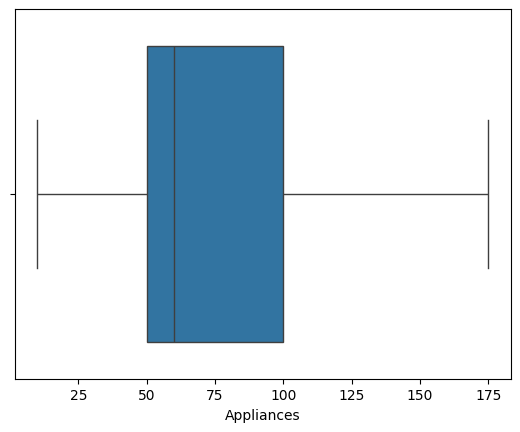

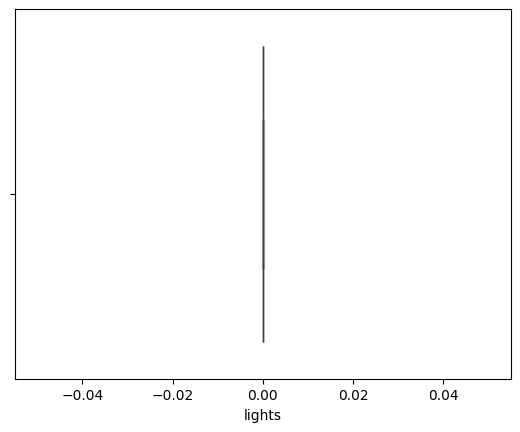

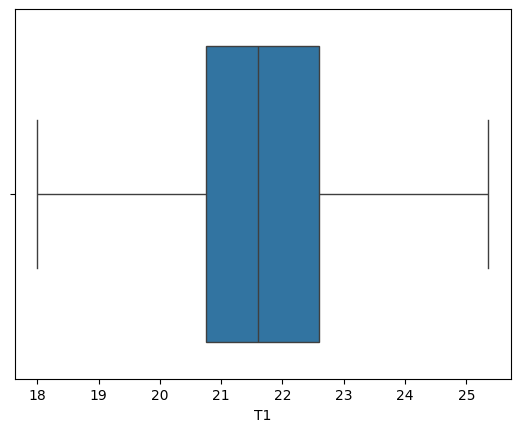

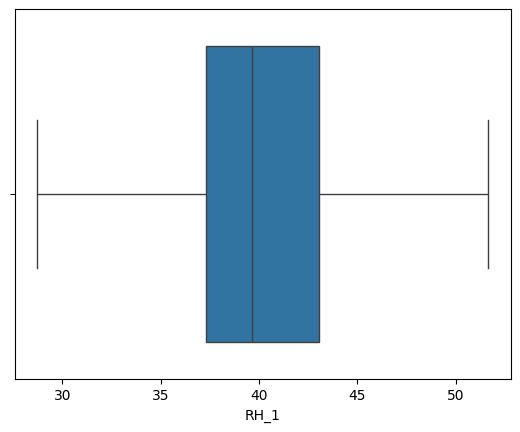

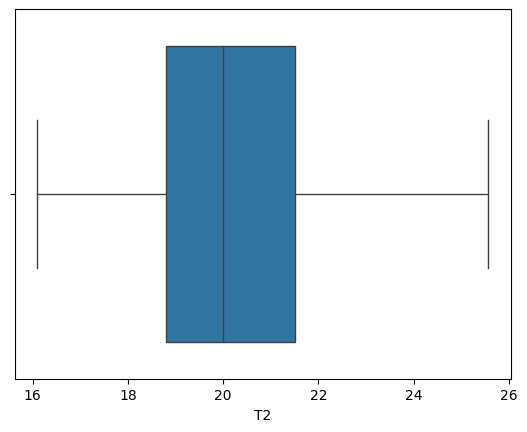

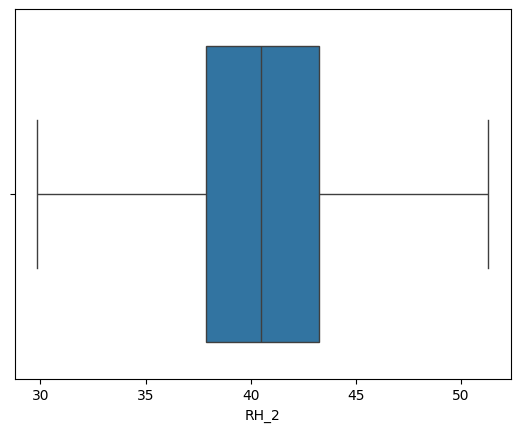

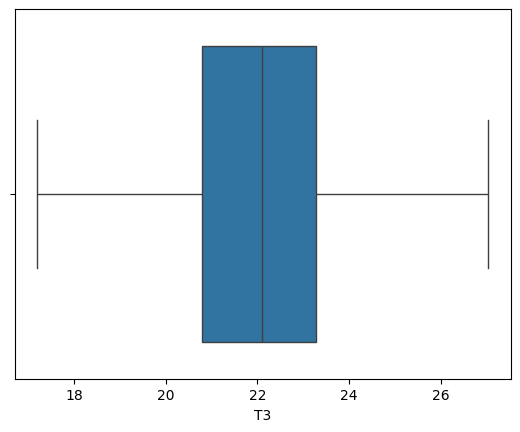

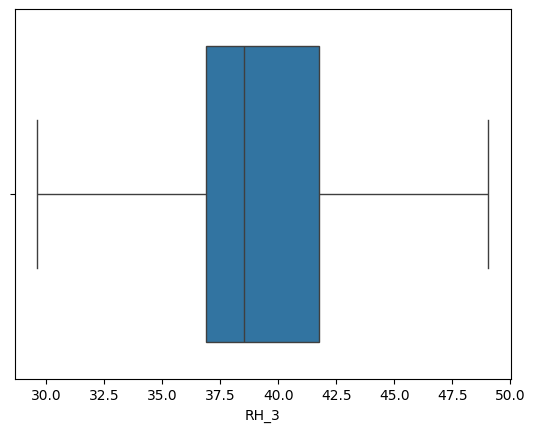

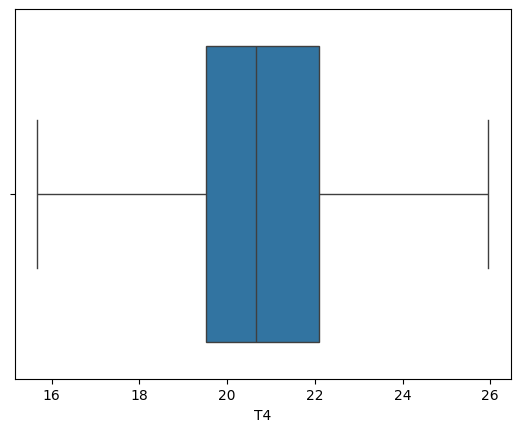

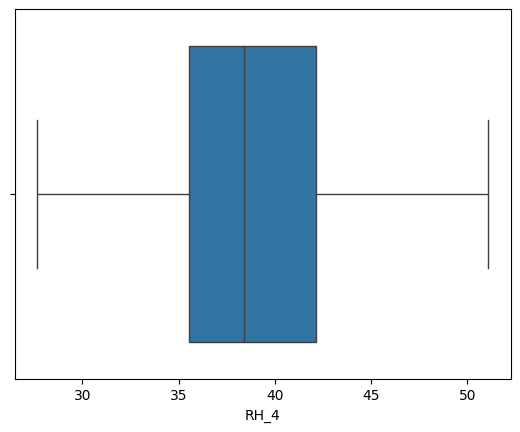

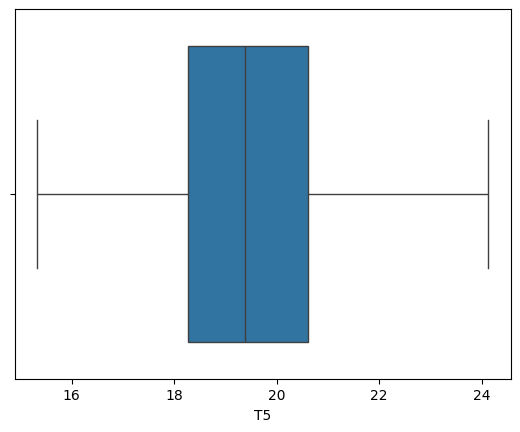

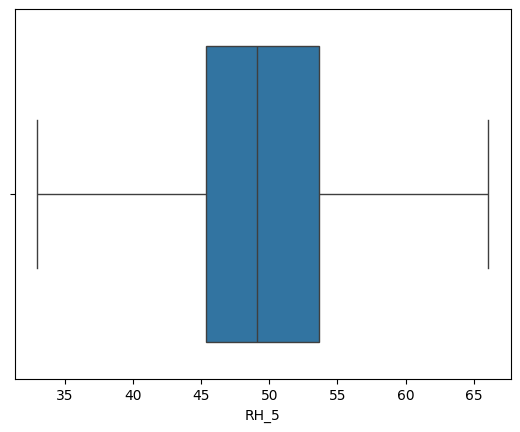

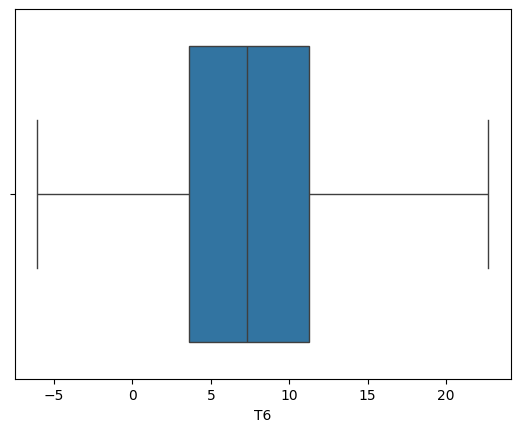

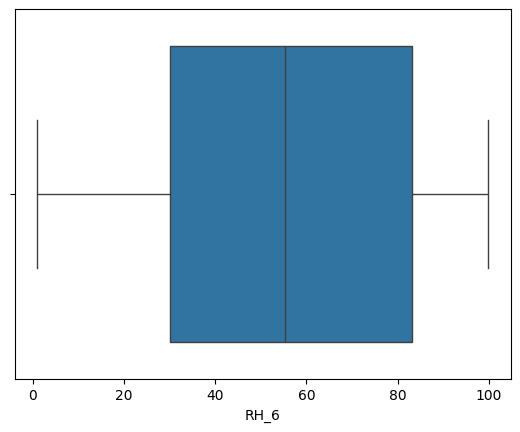

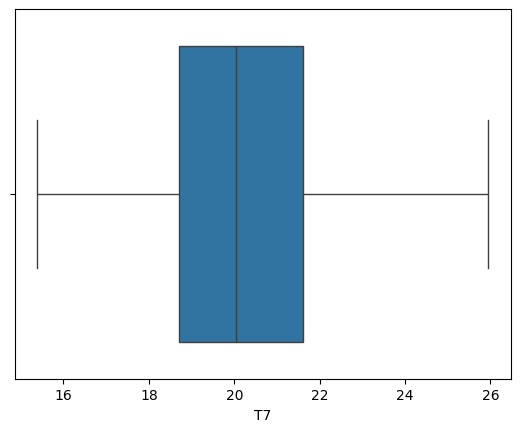

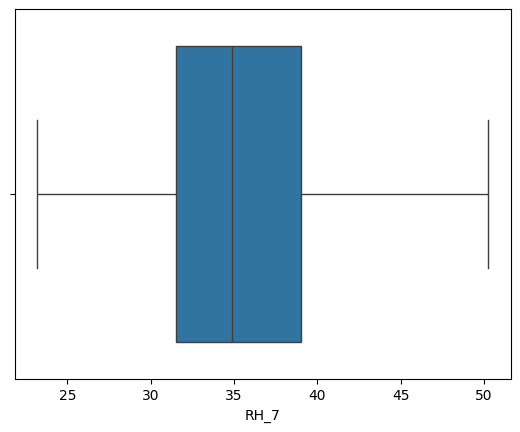

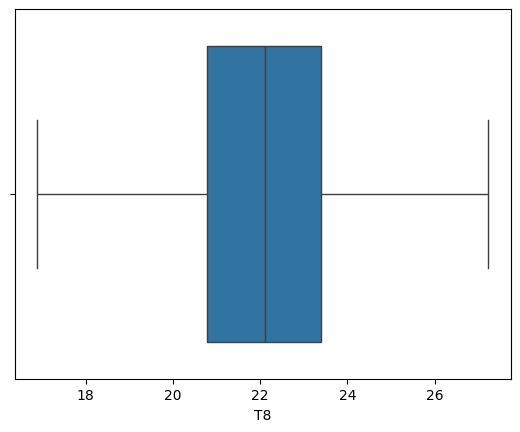

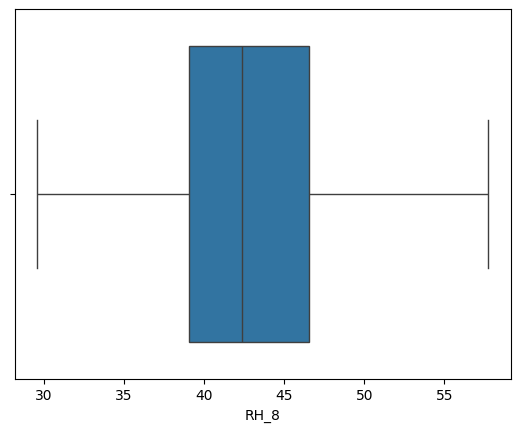

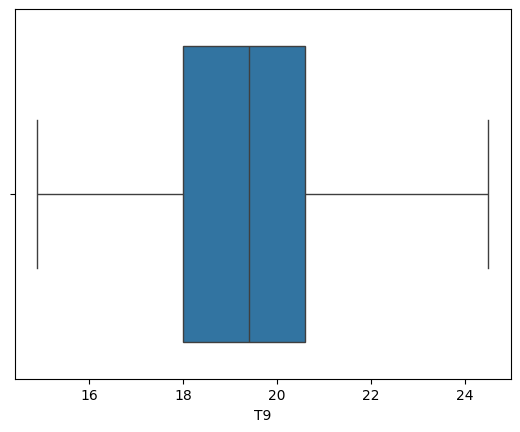

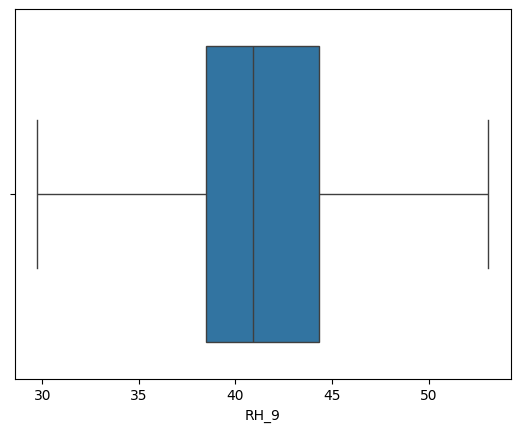

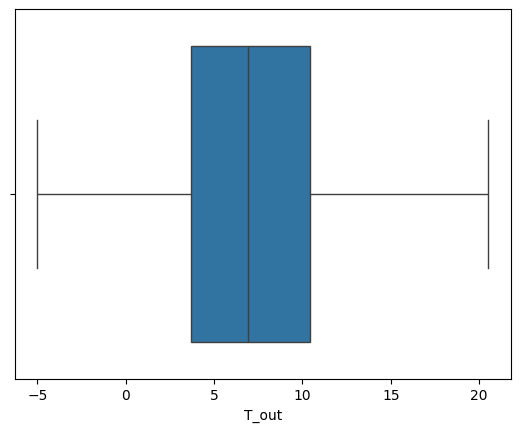

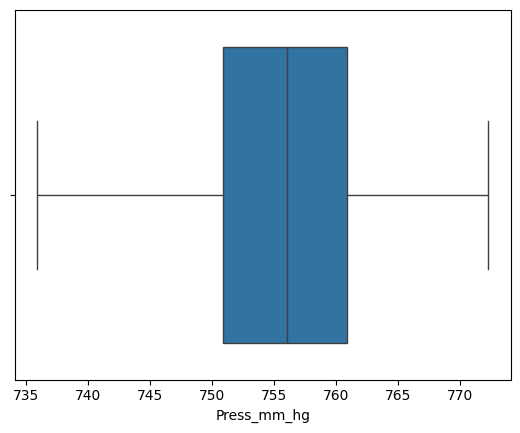

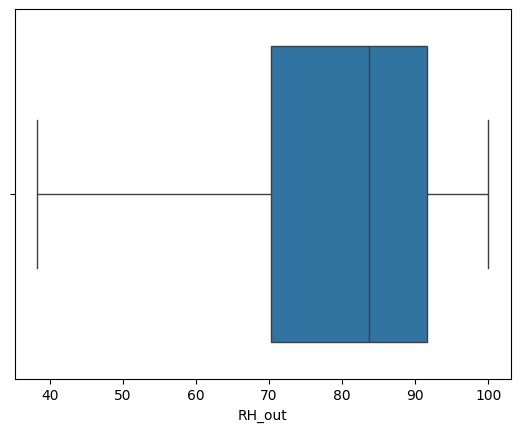

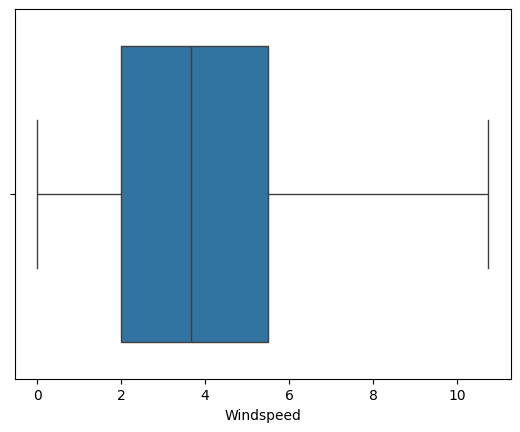

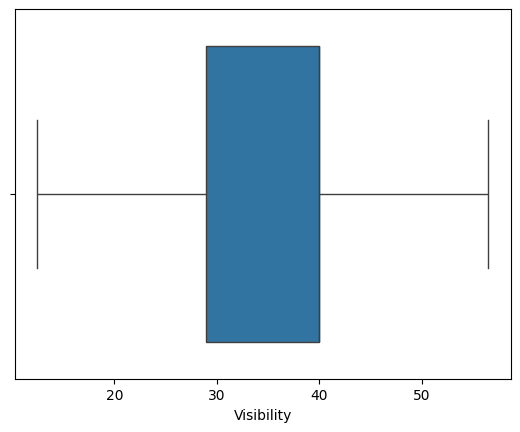

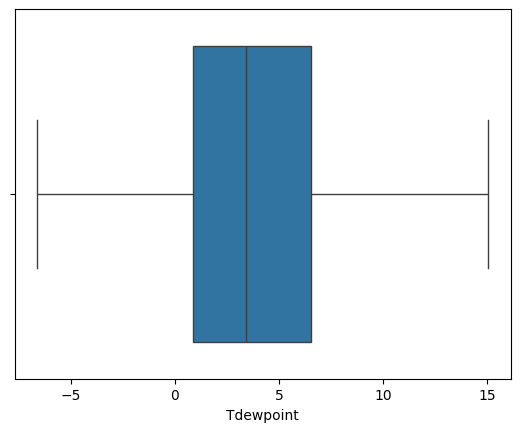

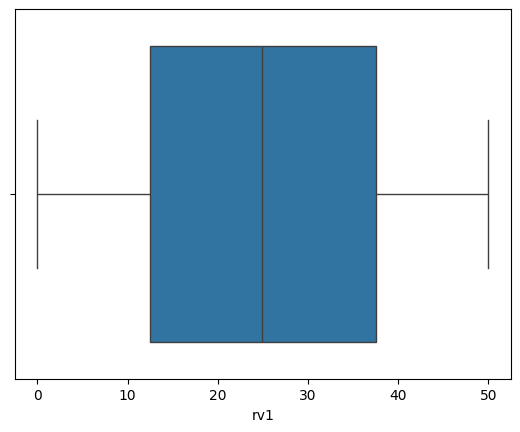

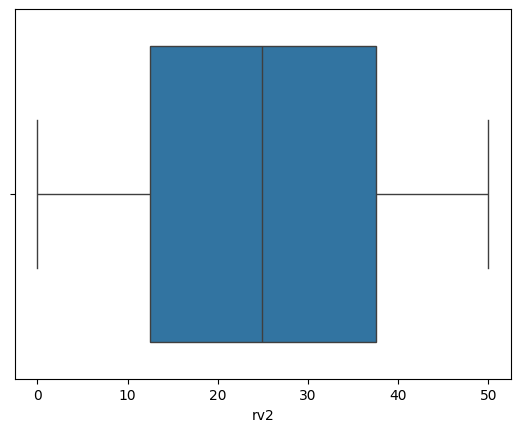

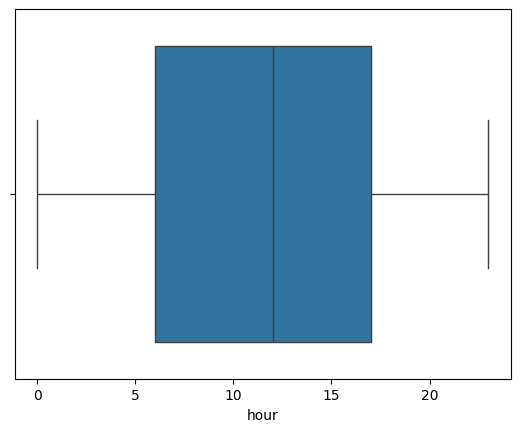

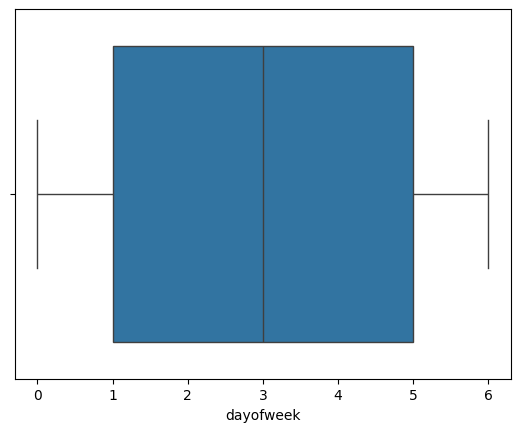

In [98]:
for i in numerical_df.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [99]:
df1.shape

(19735, 30)

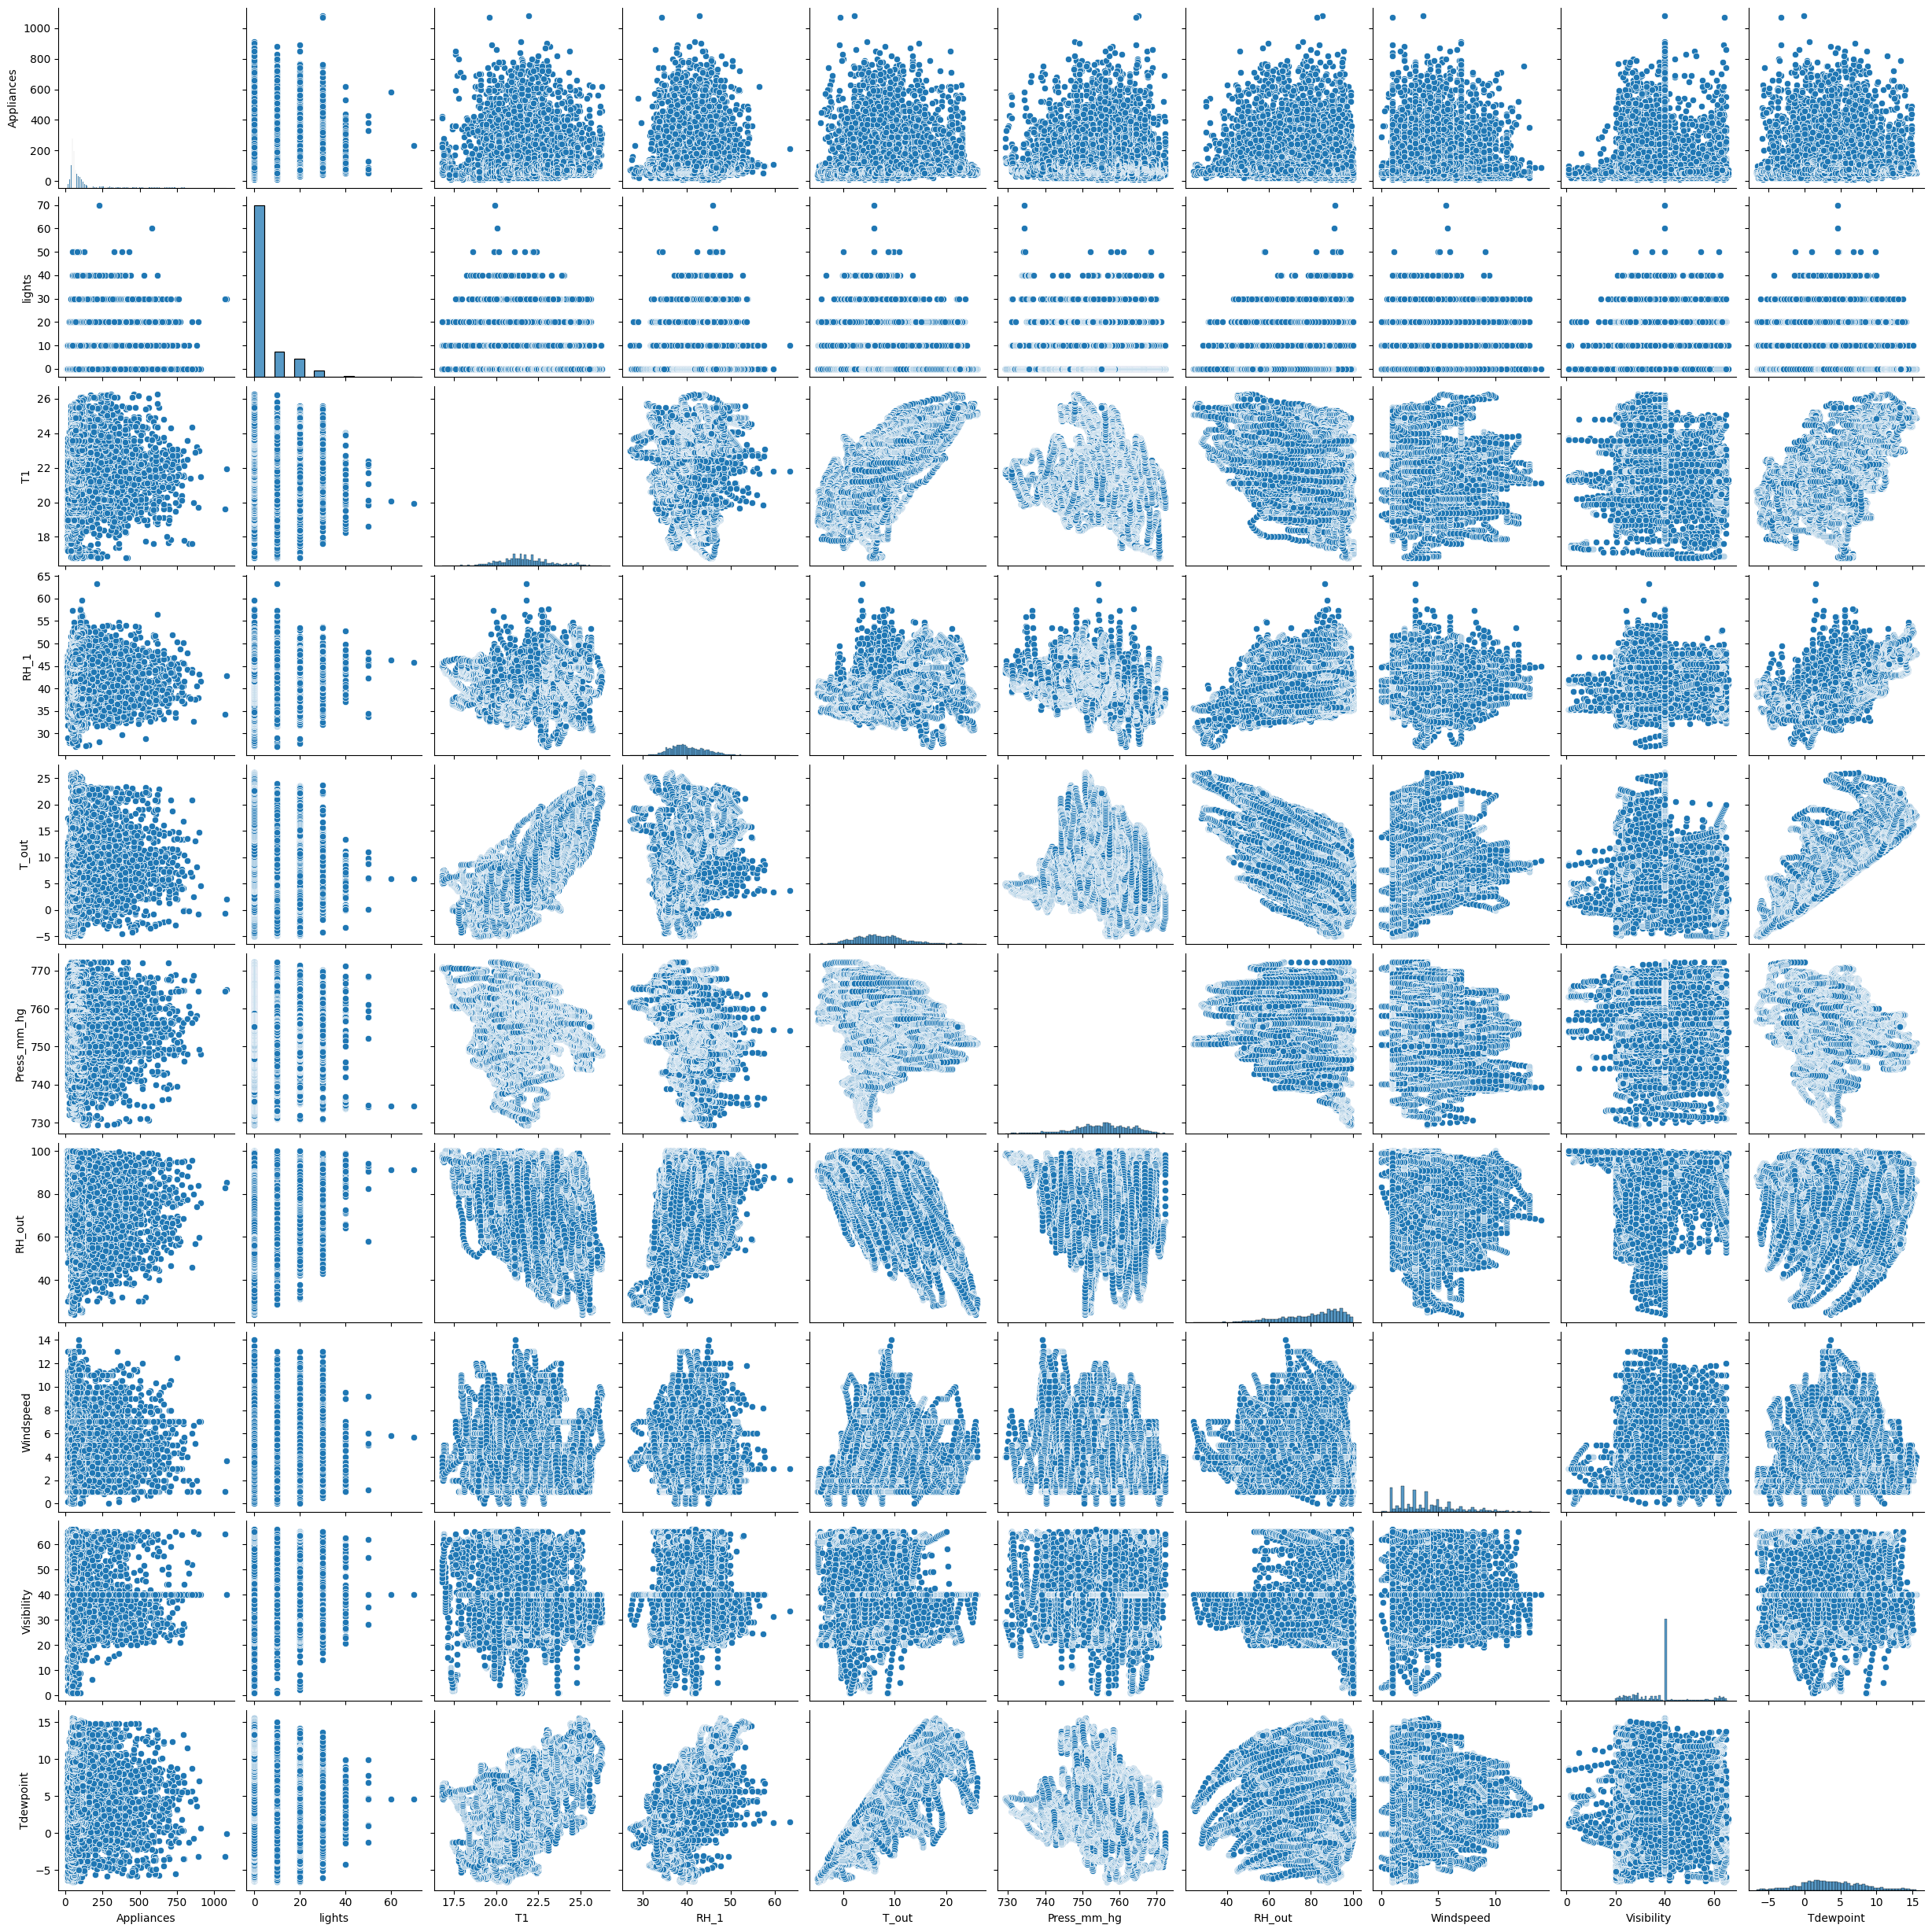

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [100]:
df1= data[['Appliances','lights','T1','RH_1','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]
sns.pairplot(df1, kind='scatter')
plt.show()
data.columns

In [101]:
df.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0        60.0     0.0  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1        60.0     0.0  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2        50.0     0.0  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3        50.0     0.0  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4        60.0     0.0  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...     T_out  Press_mm_hg  RH_out  Windspeed  \
0  19.000000  45.566667  ...  6.600000   735.933333    92.0   7.000000   
1  19.000000  45.992500  ...  6.483333   735.933333    92.0   6.666667   
2  18.926667  45.890000  ...  6.366667   735.933333    92.0   6.333333   
3  18.890000  45.723333  ...  6.250000   735.933333    92.0   6.000000   
4  18.890000  45.530000  ...  6.133333   735.933333    92.0   5.666667   

   Visibility  Tdewpoint        rv1        rv2  hour  dayofweek  
0   56.500000        5.3  13.275433  13.275433    17          0  
1   56.500000        5.2  18.606195  18.606195    17          0  
2   55.333333        5.1  28.642668  28.642668    17          0  
3   51.500000        5.0  45.410389  45.410389    17          0  
4   47.666667        4.9  10.084097  10.084097    17          0  

[5 rows x 30 columns]

In [102]:
X = df1.drop('Appliances', axis = 1)
Y = df1['Appliances']

In [103]:
le = LabelEncoder()

In [104]:
df1['Appliances'] = le.fit_transform(df1['Appliances'])

C:\Users\joann\AppData\Local\Temp\ipykernel_14884\860654021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Appliances'] = le.fit_transform(df1['Appliances'])


In [105]:
df1.skew()

Appliances     3.359196
lights         2.195155
T1             0.120917
RH_1           0.465774
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
dtype: float64

In [106]:
pt =  PowerTransformer(method = 'yeo-johnson')

In [107]:
numerical_col = df1.select_dtypes(include= 'number').columns

In [108]:
df1[numerical_col] = pt.fit_transform(df1[numerical_col])
print(df1[numerical_col].skew())

Appliances    -0.051715
lights         1.302951
T1             0.002540
RH_1           0.002707
T_out          0.089812
Press_mm_hg   -0.017835
RH_out        -0.260525
Windspeed     -0.005854
Visibility     0.067784
Tdewpoint      0.030496
dtype: float64


C:\Users\joann\AppData\Local\Temp\ipykernel_14884\869214249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[numerical_col] = pt.fit_transform(df1[numerical_col])


In [109]:
data

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

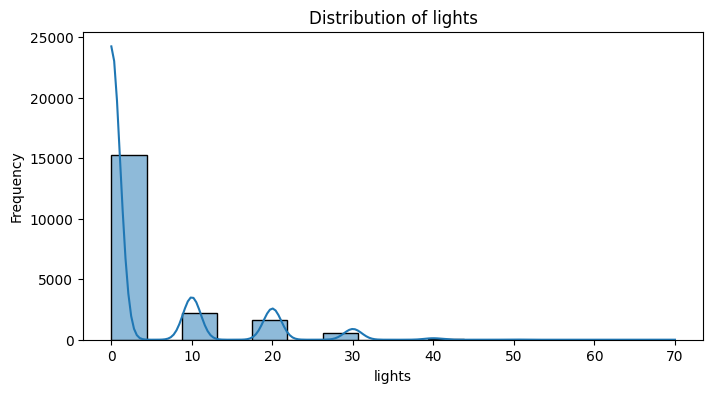

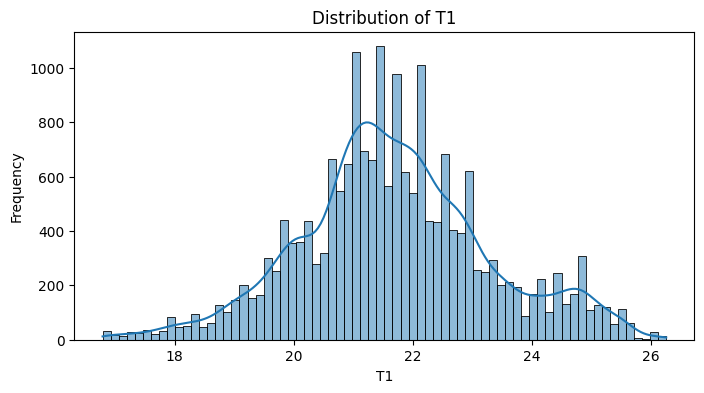

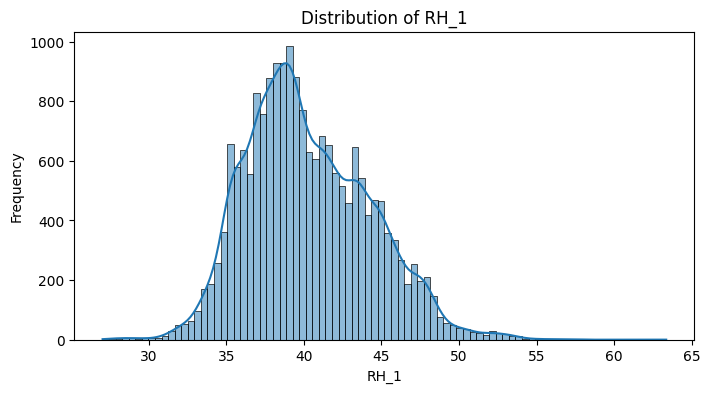

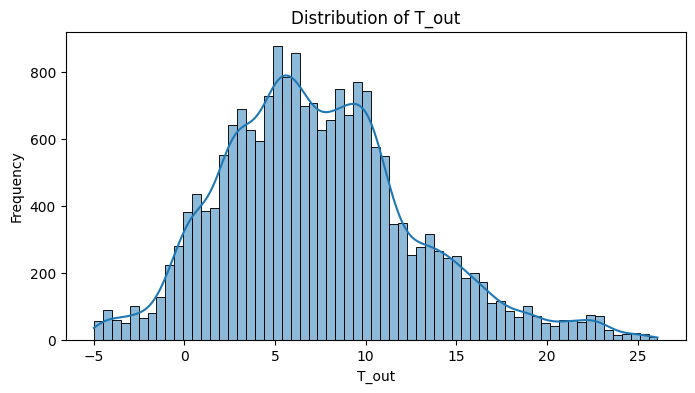

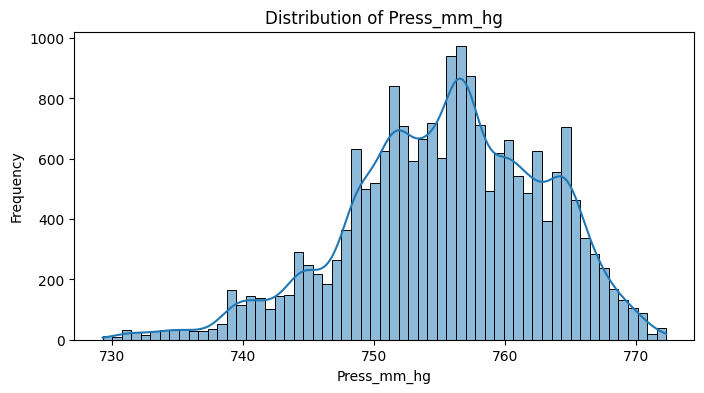

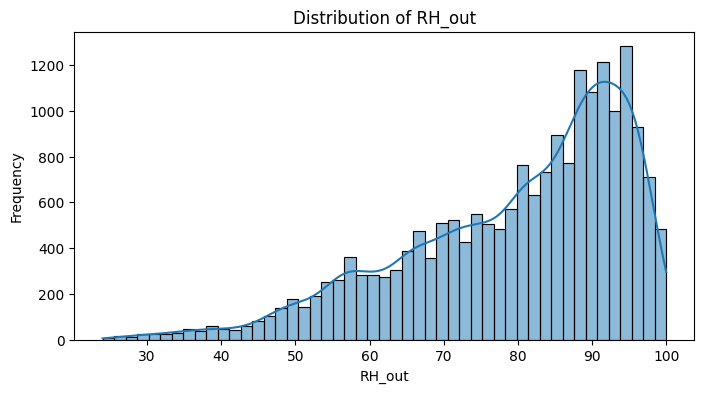

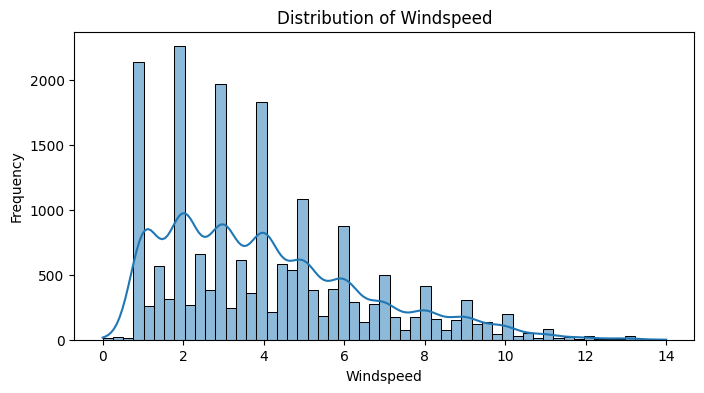

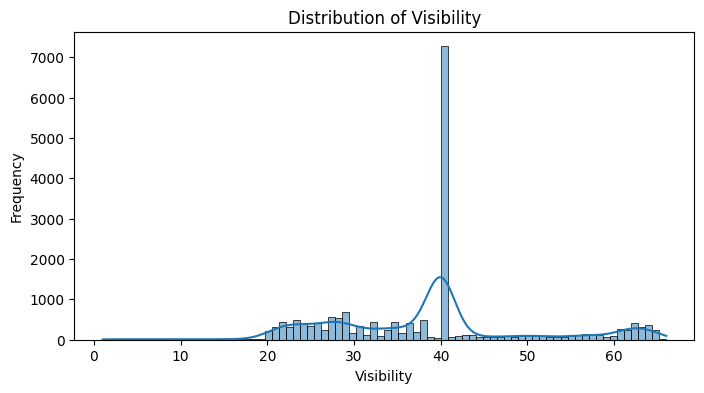

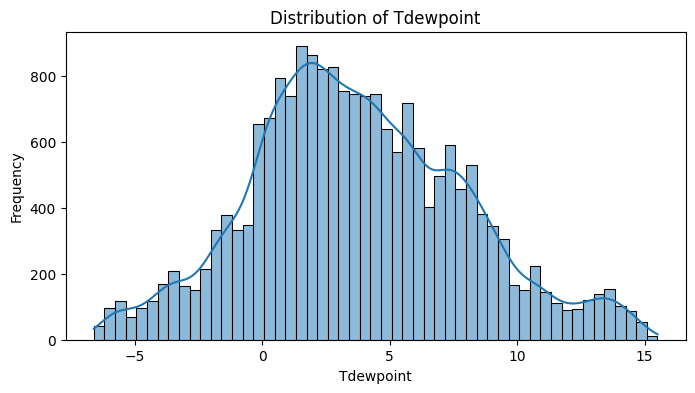

In [110]:

numerical_col = X.select_dtypes(include='number').columns  # Ensure only valid numerical columns
for i in numerical_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=X, x=i, kde=True)
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()


In [111]:
df

Appliances  lights     T1       RH_1         T2       RH_2         T3  \
0            60.0     0.0  19.89  47.596667  19.200000  44.790000  19.790000   
1            60.0     0.0  19.89  46.693333  19.200000  44.722500  19.790000   
2            50.0     0.0  19.89  46.300000  19.200000  44.626667  19.790000   
3            50.0     0.0  19.89  46.066667  19.200000  44.590000  19.790000   
4            60.0     0.0  19.89  46.333333  19.200000  44.530000  19.790000   
...           ...     ...    ...        ...        ...        ...        ...   
19730       100.0     0.0  25.36  46.560000  25.565000  42.025714  27.040000   
19731        90.0     0.0  25.36  46.500000  25.565000  42.080000  27.040000   
19732       175.0     0.0  25.36  46.596667  25.565000  42.768571  27.040000   
19733       175.0     0.0  25.36  46.990000  25.414000  43.036000  26.890000   
19734       175.0     0.0  25.36  46.600000  25.264286  42.971429  26.823333   

            RH_3         T4       RH_4  ...      T_out  Press_mm_hg  \
0      44.730000  19.000000  45.566667  ...   6.600000   735.933333   
1      44.790000  19.000000  45.992500  ...   6.483333   735.933333   
2      44.933333  18.926667  45.890000  ...   6.366667   735.933333   
3      45.000000  18.890000  45.723333  ...   6.250000   735.933333   
4      45.000000  18.890000  45.530000  ...   6.133333   735.933333   
...          ...        ...        ...  ...        ...          ...   
19730  41.163333  24.700000  45.590000  ...  20.520833   755.200000   
19731  41.223333  24.700000  45.590000  ...  20.520833   755.200000   
19732  41.690000  24.700000  45.730000  ...  20.520833   755.200000   
19733  41.290000  24.700000  45.790000  ...  20.520833   755.200000   
19734  41.156667  24.700000  45.963333  ...  20.520833   755.200000   

          RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0      92.000000   7.000000   56.500000   5.300000  13.275433  13.275433   
1      92.000000   6.666667   56.500000   5.200000  18.606195  18.606195   
2      92.000000   6.333333   55.333333   5.100000  28.642668  28.642668   
3      92.000000   6.000000   51.500000   5.000000  45.410389  45.410389   
4      92.000000   5.666667   47.666667   4.900000  10.084097  10.084097   
...          ...        ...         ...        ...        ...        ...   
19730  55.666667   3.333333   23.666667  13.333333  43.096812  43.096812   
19731  56.000000   3.500000   24.500000  13.300000  49.282940  49.282940   
19732  56.333333   3.666667   25.333333  13.266667  29.199117  29.199117   
19733  56.666667   3.833333   26.166667  13.233333   6.322784   6.322784   
19734  57.000000   4.000000   27.000000  13.200000  34.118851  34.118851   

       hour  dayofweek  
0        17          0  
1        17          0  
2        17          0  
3        17          0  
4        17          0  
...     ...        ...  
19730    17          4  
19731    17          4  
19732    17          4  
19733    17          4  
19734    18          4  

[19735 rows x 30 columns]

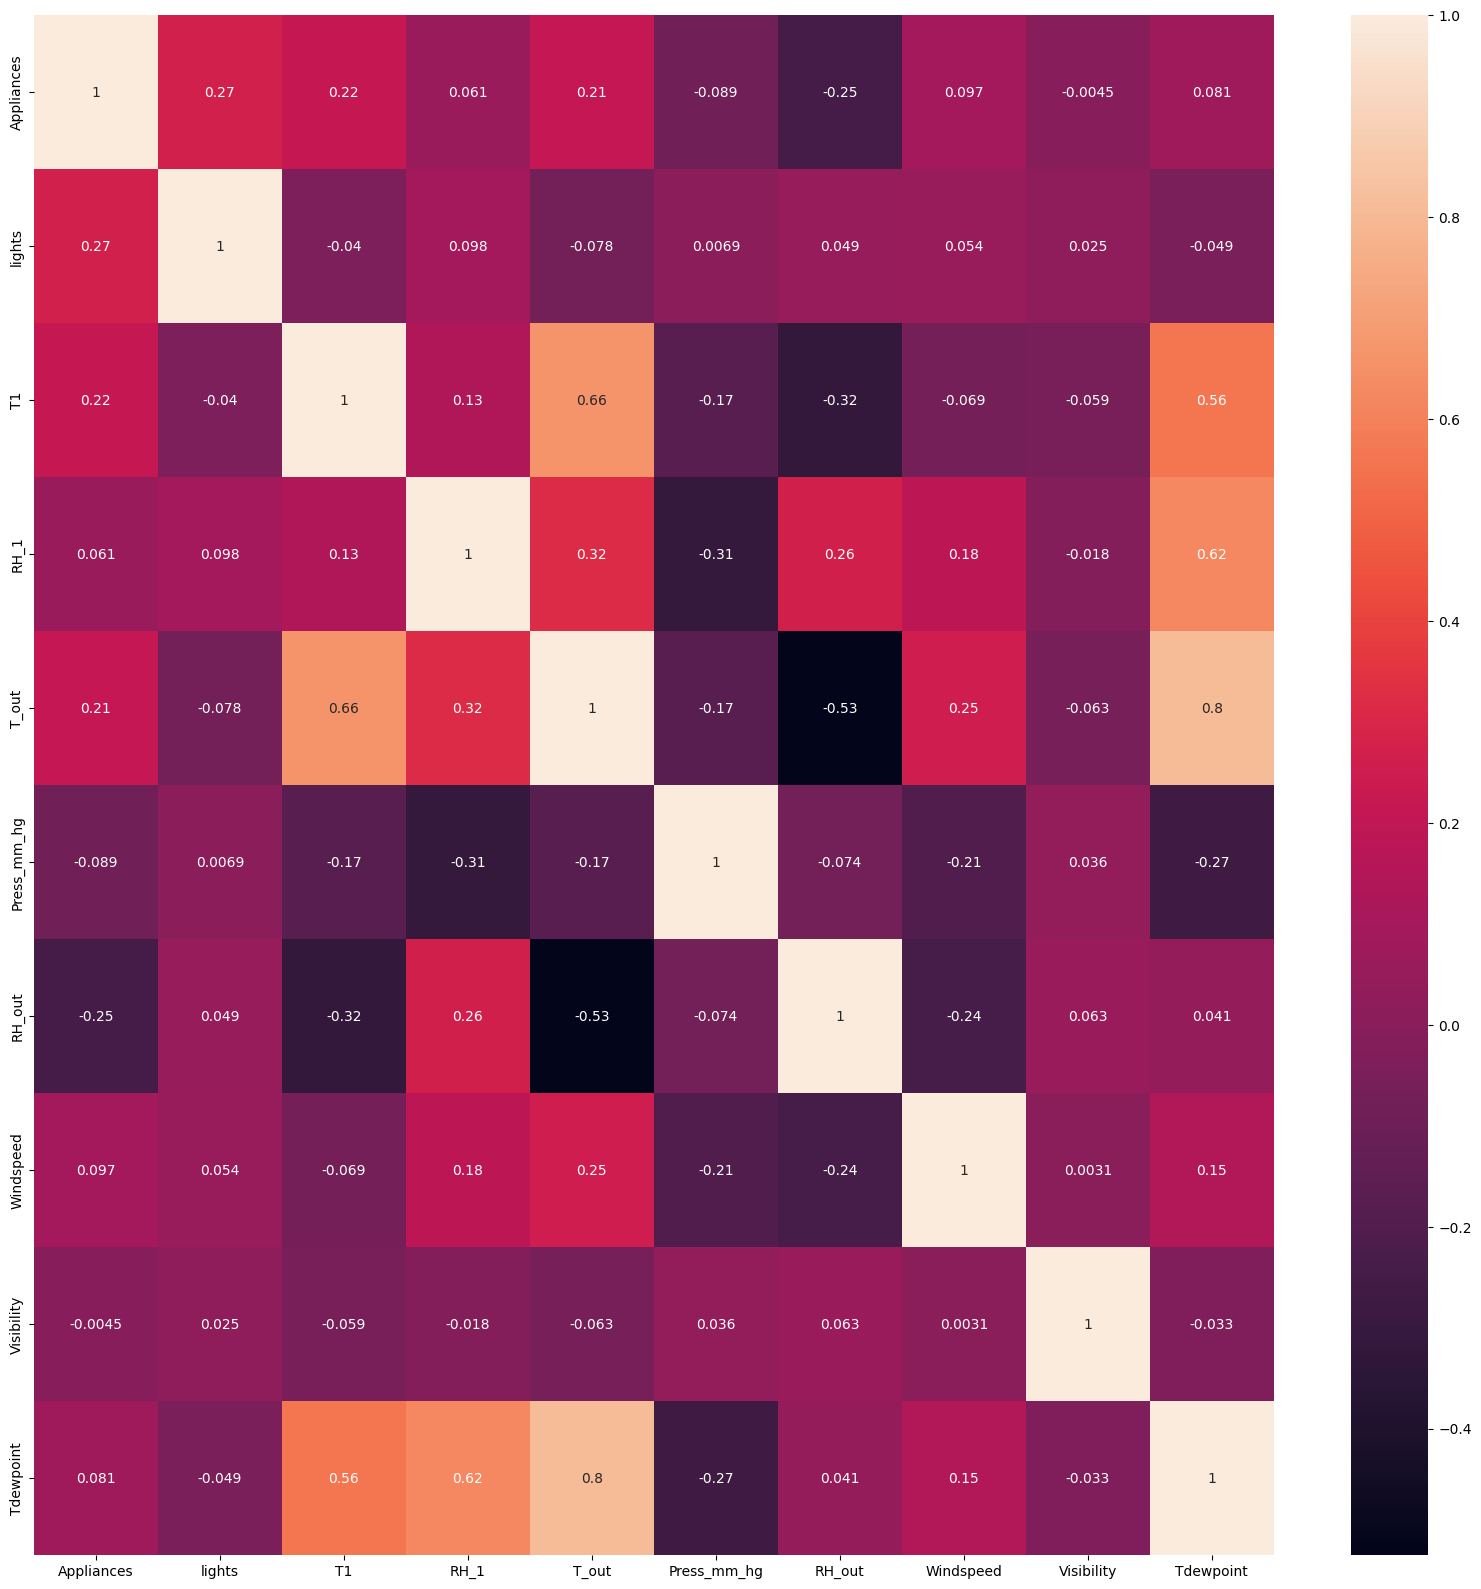

In [112]:
# Explore the relationship between features: 

# compute the correlation matrix
corr_matrix = df1.corr()

# create the heatmap with a larger size
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='rocket', annot=True)

# show the plot
plt.show()


In [113]:
sk = SelectKBest(score_func= f_regression, k=10 )

In [114]:
k_best = sk.fit_transform(X,Y)

C:\Users\joann\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


In [115]:
selected_features = X.columns[sk.get_support()]

In [116]:
selected_features

Index(['lights', 'T1', 'RH_1', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

In [117]:
feature_score = pd.DataFrame({
    'Features' : X.columns,
    'Score' : sk.scores_}).sort_values(by= 'Score',ascending=False)

In [118]:
feature_score

Features       Score
0       lights  799.076292
5       RH_out  468.470558
3        T_out  195.934202
6    Windspeed  150.924181
2         RH_1  147.140998
1           T1   60.854665
4  Press_mm_hg   24.043360
8    Tdewpoint    4.652459
7   Visibility    0.001047

In [119]:
X_sel = X[selected_features]

In [120]:
X_sel.columns

Index(['lights', 'T1', 'RH_1', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

In [121]:
sc = StandardScaler()

In [122]:
X_scaled = sc.fit_transform(X_sel)

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sel, Y, test_size=0.2, random_state=42)
X_train.shape

(15788, 9)

In [124]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [125]:
X_test.shape

(3947, 9)

In [126]:
Y_train.shape

(15788,)

In [127]:
Y_test.shape

(3947,)

In [128]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR()
}

In [129]:
Y_train = Y_train.round().astype(int)
Y_test = Y_test.round().astype(int)

In [130]:
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(Y_test, Y_pred),
        'MSE': mean_squared_error(Y_test, Y_pred),
        'RMSE': np.sqrt(mean_squared_error(Y_test, Y_pred)),
        'R2 Score': r2_score(Y_test, Y_pred)
    }

In [131]:
results_df = pd.DataFrame(results).T
print(results_df)

                                      MAE           MSE        RMSE  R2 Score
Linear Regression               55.760231   9056.051206   95.163287  0.095037
Random Forest                   33.761439   4887.328857   69.909433  0.511613
Gradient Boosting               51.537141   8058.867841   89.771197  0.194684
Support Vector Regressor (SVR)  48.330866  11064.369160  105.187305 -0.105653


In [132]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [133]:
pipeline = Pipeline([
    ('Imputer',SimpleImputer(strategy='mean')),
    ('model', RandomForestRegressor()),
])

In [139]:
param_grid = {'n_estimators': [50, 100, 200], 
              'max_depth': [None, 10, 20]
             }

In [140]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [141]:

Y_pred_best = grid_search.best_estimator_.predict(X_test)

In [142]:
print("Best parameters:", grid_search.best_params_)
print("Best R2 Score:", r2_score(Y_test, Y_pred_best))

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best R2 Score: 0.5139142780893939


In [143]:

joblib.dump(grid_search.best_estimator_, 'Energy_Consumption_Prediction.joblib')

['Energy_Consumption_Prediction.joblib']

In [144]:

loaded_model = joblib.load('Energy_Consumption_Prediction.joblib')

In [145]:
pipeline.fit(X_train, Y_train)  # Fit first on training data
Y_pred = pipeline.predict(X_test)  # Then predict on test data

In [146]:
print(Y_pred)

[ 54.9 121.2  49.9 ... 134.   79.7  62.3]
